<a href="https://colab.research.google.com/github/rajamitjain/global_vaccination_analysis/blob/main/Vaccination_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.5 MB 5.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
pip install plotly --upgrade

     |████████████████████████████████| 23.9 MB 13 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [4]:
import pandas as pd
import plotly.express as px
import seaborn as sns

df_vaccine = pd.read_csv("/content/drive/MyDrive/covid vaccination analysis/country_vaccinations.csv", parse_dates=True)

In [5]:
df_vaccine.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/


In [6]:
df_vaccine.shape

(26552, 15)

In [7]:
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26552 entries, 0 to 26551
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              26552 non-null  object 
 1   iso_code                             26552 non-null  object 
 2   date                                 26552 non-null  object 
 3   total_vaccinations                   14893 non-null  float64
 4   people_vaccinated                    14110 non-null  float64
 5   people_fully_vaccinated              11383 non-null  float64
 6   daily_vaccinations_raw               12298 non-null  float64
 7   daily_vaccinations                   26277 non-null  float64
 8   total_vaccinations_per_hundred       14893 non-null  float64
 9   people_vaccinated_per_hundred        14110 non-null  float64
 10  people_fully_vaccinated_per_hundred  11383 non-null  float64
 11  daily_vaccinations_per_milli

**Removing unwanted columns**

In [8]:
df = df_vaccine.drop(labels=["daily_vaccinations_raw", "source_name", "source_website"], axis=1, inplace=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26552 entries, 0 to 26551
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              26552 non-null  object 
 1   iso_code                             26552 non-null  object 
 2   date                                 26552 non-null  object 
 3   total_vaccinations                   14893 non-null  float64
 4   people_vaccinated                    14110 non-null  float64
 5   people_fully_vaccinated              11383 non-null  float64
 6   daily_vaccinations                   26277 non-null  float64
 7   total_vaccinations_per_hundred       14893 non-null  float64
 8   people_vaccinated_per_hundred        14110 non-null  float64
 9   people_fully_vaccinated_per_hundred  11383 non-null  float64
 10  daily_vaccinations_per_million       26277 non-null  float64
 11  vaccines                    

In [10]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"


**Sorting the table according to country and date in ascending order**

In [11]:
df.sort_values(by=['country', 'date'])
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,0.00,0.00,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...,...,...,...,...
26547,Zimbabwe,ZWE,2021-06-19,1133920.0,701348.0,432572.0,4360.0,7.63,4.72,2.91,293.0,Sinopharm/Beijing
26548,Zimbabwe,ZWE,2021-06-20,1138733.0,703065.0,435668.0,4525.0,7.66,4.73,2.93,304.0,Sinopharm/Beijing
26549,Zimbabwe,ZWE,2021-06-21,1140852.0,704001.0,436851.0,4664.0,7.68,4.74,2.94,314.0,Sinopharm/Beijing
26550,Zimbabwe,ZWE,2021-06-22,1146378.0,706158.0,440220.0,4700.0,7.71,4.75,2.96,316.0,Sinopharm/Beijing


In [12]:
df['vaccines'].unique() # Number of unique combinations of vaccines 

array(['BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V',
       'Oxford/AstraZeneca, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech', 'Oxford/AstraZeneca',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac, Sputnik V', 'Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'BBIBP-CorV, Sputnik V', 'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Sinovac', 'Moderna, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac',
       'BBIBP-CorV, Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Covaxin, Oxford/AstraZeneca', 'BBIBP-CorV',
       'CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'CanSino, Sinopharm/Bei

### **Which combination of vaccine is used by which country?**

In [13]:
df['country'].nunique()

217

In [14]:
country_regions = pd.read_csv("/content/drive/MyDrive/covid vaccination analysis/continents2.csv")
country_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    object 
 1   alpha-2                   248 non-null    object 
 2   alpha-3                   249 non-null    object 
 3   country-code              249 non-null    int64  
 4   iso_3166-2                249 non-null    object 
 5   region                    248 non-null    object 
 6   sub-region                248 non-null    object 
 7   intermediate-region       107 non-null    object 
 8   region-code               248 non-null    float64
 9   sub-region-code           248 non-null    float64
 10  intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB


In [15]:
country_regions.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [16]:
country_regions.rename(columns={"alpha-3": "iso_code"}, inplace=True)
country_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    object 
 1   alpha-2                   248 non-null    object 
 2   iso_code                  249 non-null    object 
 3   country-code              249 non-null    int64  
 4   iso_3166-2                249 non-null    object 
 5   region                    248 non-null    object 
 6   sub-region                248 non-null    object 
 7   intermediate-region       107 non-null    object 
 8   region-code               248 non-null    float64
 9   sub-region-code           248 non-null    float64
 10  intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB


In [17]:
df1 = df.merge(country_regions, how='inner', on="iso_code")

In [18]:
df1.drop(columns=["name", "alpha-2", "country-code", "iso_3166-2", "sub-region", "intermediate-region", "region-code", "sub-region-code", "intermediate-region-code"], inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25555 entries, 0 to 25554
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              25555 non-null  object 
 1   iso_code                             25555 non-null  object 
 2   date                                 25555 non-null  object 
 3   total_vaccinations                   14142 non-null  float64
 4   people_vaccinated                    13362 non-null  float64
 5   people_fully_vaccinated              10677 non-null  float64
 6   daily_vaccinations                   25286 non-null  float64
 7   total_vaccinations_per_hundred       14142 non-null  float64
 8   people_vaccinated_per_hundred        13362 non-null  float64
 9   people_fully_vaccinated_per_hundred  10677 non-null  float64
 10  daily_vaccinations_per_million       25286 non-null  float64
 11  vaccines                    

**Reordering dataframe columns**

In [19]:
# mid = df1['region']
# df1.drop(labels=['region'], axis=1, inplace = True)
# df1.insert(1, 'region', mid)
region_column = df1.pop('region')
df1.insert(1, 'region', region_column)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25555 entries, 0 to 25554
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              25555 non-null  object 
 1   region                               25555 non-null  object 
 2   iso_code                             25555 non-null  object 
 3   date                                 25555 non-null  object 
 4   total_vaccinations                   14142 non-null  float64
 5   people_vaccinated                    13362 non-null  float64
 6   people_fully_vaccinated              10677 non-null  float64
 7   daily_vaccinations                   25286 non-null  float64
 8   total_vaccinations_per_hundred       14142 non-null  float64
 9   people_vaccinated_per_hundred        13362 non-null  float64
 10  people_fully_vaccinated_per_hundred  10677 non-null  float64
 11  daily_vaccinations_per_milli

### **Which vaccine combination is used by which country?**

In [21]:
sunb = df1[['region', 'country', 'vaccines']]
sunb.drop_duplicates().reset_index(inplace=True)

In [22]:
#del dict
fig = px.sunburst(sunb,path=['region', 'vaccines', 'country'], title="Vaccine combination used by Countries", height=1000, width=1000)
fig.update_traces(insidetextorientation='radial')
fig.update_layout(uniformtext= dict(minsize=10, mode='hide'))
fig.show()

### **Which country uses which vaccine?**

In [23]:
unique_vaccine = [val.strip() for sublist in df1.vaccines.dropna().str.split(",").tolist() for val in sublist]
list(set(unique_vaccine))

['BBIBP-CorV',
 'EpiVacCorona',
 'Pfizer/BioNTech',
 'Sinopharm/HayatVax',
 'RBD-Dimer',
 'Johnson&Johnson',
 'Moderna',
 'Sputnik V',
 'Abdala',
 'Soberana02',
 'Covaxin',
 'QazVac',
 'CanSino',
 'Sinopharm/Beijing',
 'Sinopharm/Wuhan',
 'Sinovac',
 'Oxford/AstraZeneca']

In [24]:
country_vaccine = df1[['region' ,'country', 'vaccines']]
country_vaccine.drop_duplicates(subset=["country", "vaccines"], inplace=True)
country_vaccine.reset_index(drop=True, inplace=True)
country_vaccine

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,region,country,vaccines
0,Asia,Afghanistan,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
1,Europe,Albania,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ..."
2,Africa,Algeria,"Oxford/AstraZeneca, Sputnik V"
3,Europe,Andorra,"Oxford/AstraZeneca, Pfizer/BioNTech"
4,Africa,Angola,Oxford/AstraZeneca
...,...,...,...
206,Asia,Vietnam,Oxford/AstraZeneca
207,Oceania,Wallis and Futuna,Oxford/AstraZeneca
208,Asia,Yemen,Oxford/AstraZeneca
209,Africa,Zambia,"Oxford/AstraZeneca, Sinopharm/Beijing"


In [25]:
country_vaccine["vaccines"] = country_vaccine["vaccines"].str.split(",")
country_vaccine.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,region,country,vaccines
0,Asia,Afghanistan,"[BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioN..."
1,Europe,Albania,"[Oxford/AstraZeneca, Pfizer/BioNTech, Sinova..."
2,Africa,Algeria,"[Oxford/AstraZeneca, Sputnik V]"
3,Europe,Andorra,"[Oxford/AstraZeneca, Pfizer/BioNTech]"
4,Africa,Angola,[Oxford/AstraZeneca]


In [26]:
country_vaccine = country_vaccine.explode('vaccines')

In [27]:
country_vaccine.reset_index(drop=True, inplace=True)
country_vaccine['vaccines']= country_vaccine['vaccines'].str.lstrip()
country_vaccine.head()

,region,country,vaccines
0,Asia,Afghanistan,BBIBP-CorV
1,Asia,Afghanistan,Oxford/AstraZeneca
2,Asia,Afghanistan,Pfizer/BioNTech
3,Europe,Albania,Oxford/AstraZeneca
4,Europe,Albania,Pfizer/BioNTech


In [28]:
country_vaccine[country_vaccine['region']=="Asia"]['vaccines'].unique()

array(['BBIBP-CorV', 'Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sinovac',
       'Sputnik V', 'Sinopharm/Beijing', 'CanSino', 'Sinopharm/Wuhan',
       'Johnson&Johnson', 'Moderna', 'Covaxin', 'QazVac',
       'Sinopharm/HayatVax', 'EpiVacCorona', 'RBD-Dimer'], dtype=object)

IMPORT Matplotlib

In [29]:
import matplotlib.pyplot as plt

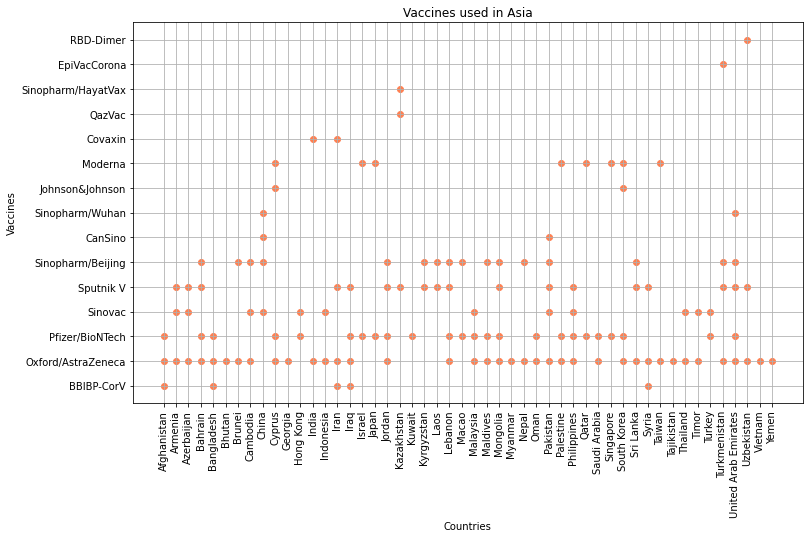

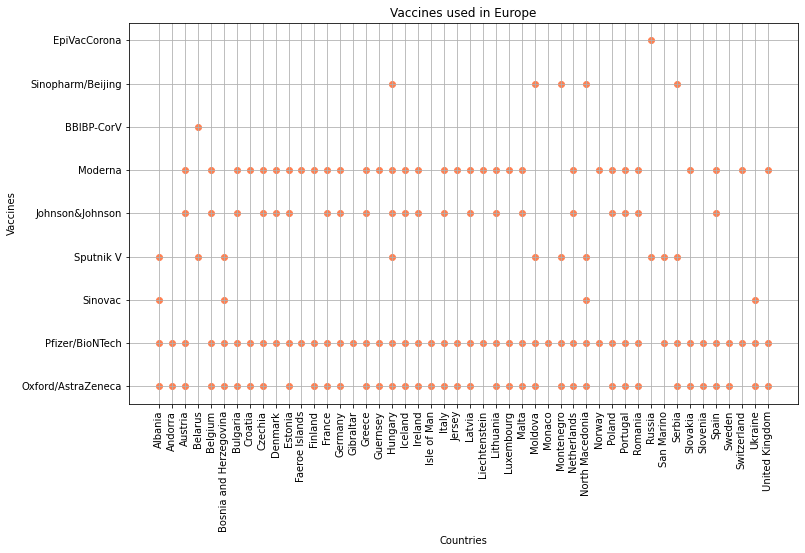

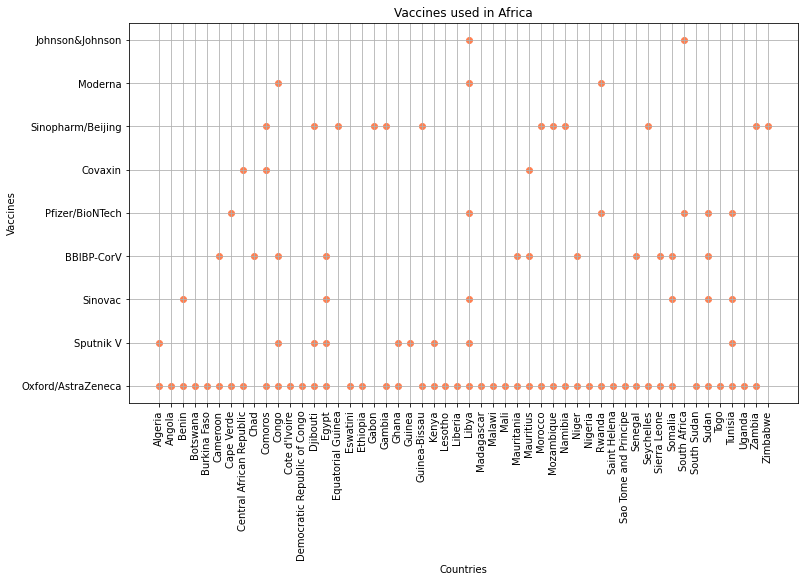

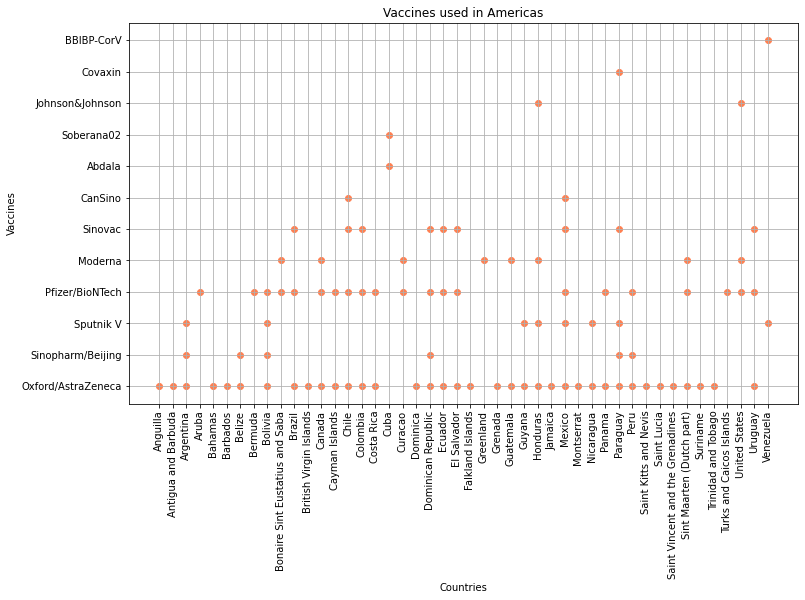

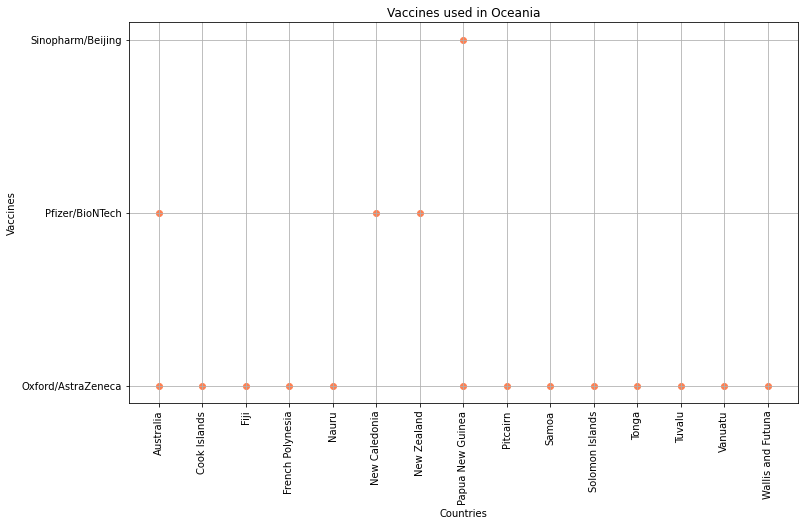

In [30]:
for x in country_vaccine['region'].unique():
  country_asia=country_vaccine[country_vaccine['region']==x]['country']
  vaccine_asia=country_vaccine[country_vaccine['region']==x]['vaccines']

  fig, ax = plt.subplots(figsize=(12, 7))
  
  ax.scatter(x=country_asia, y = vaccine_asia, c="Coral")
  plt.title("Vaccines used in "+x)
  plt.xlabel("Countries")
  plt.ylabel("Vaccines")
  plt.xticks(rotation=90)

  plt.grid()
  plt.show()

### **How many % of countries use a specific vaccine?**

In [31]:
val = {}
i=0
for x in set(country_vaccine['vaccines']):
 
  y = (country_vaccine[country_vaccine['vaccines']==x]['country'].nunique())*100/country_vaccine['country'].nunique()
  dict = {i : [x, y]}
  val.update(dict)
  i = i+1

print(val)

{0: ['BBIBP-CorV', 8.530805687203792], 1: ['EpiVacCorona', 0.9478672985781991], 2: ['Pfizer/BioNTech', 47.39336492890995], 3: ['Sinopharm/HayatVax', 0.47393364928909953], 4: ['RBD-Dimer', 0.47393364928909953], 5: ['Johnson&Johnson', 12.796208530805687], 6: ['Moderna', 24.170616113744074], 7: ['Sputnik V', 21.327014218009477], 8: ['Abdala', 0.47393364928909953], 9: ['Soberana02', 0.47393364928909953], 10: ['Covaxin', 2.843601895734597], 11: ['QazVac', 0.47393364928909953], 12: ['CanSino', 1.8957345971563981], 13: ['Sinopharm/Beijing', 18.95734597156398], 14: ['Sinopharm/Wuhan', 0.9478672985781991], 15: ['Sinovac', 14.691943127962086], 16: ['Oxford/AstraZeneca', 81.51658767772511]}


In [32]:
df2 = pd.DataFrame()
df2 = df2.from_dict(val, orient='index', columns=['Vaccine', 'percent'])
#df2.drop('country', axis=1, inplace=True)
df2

,Vaccine,percent
0,BBIBP-CorV,8.530806
1,EpiVacCorona,0.947867
2,Pfizer/BioNTech,47.393365
3,Sinopharm/HayatVax,0.473934
4,RBD-Dimer,0.473934
5,Johnson&Johnson,12.796209
6,Moderna,24.170616
7,Sputnik V,21.327014
8,Abdala,0.473934
9,Soberana02,0.473934


In [33]:
fig = px.pie(df2, values="percent", names=df2["Vaccine"], title="Distribution of vaccines over the countries(in %)")
fig.show()

### *Observation: Maximum % of countries use Oxford/AstraZeneca followed by Pfizer/BioNTech*

In [34]:
country_vaccine['vaccines'].value_counts()

Oxford/AstraZeneca    172
Pfizer/BioNTech       100
Moderna                51
Sputnik V              45
Sinopharm/Beijing      40
Sinovac                31
Johnson&Johnson        27
BBIBP-CorV             18
Covaxin                 6
CanSino                 4
EpiVacCorona            2
Sinopharm/Wuhan         2
Abdala                  1
QazVac                  1
Sinopharm/HayatVax      1
Soberana02              1
RBD-Dimer               1
Name: vaccines, dtype: int64

In [35]:
country_vaccine.head(10)

,region,country,vaccines
0,Asia,Afghanistan,BBIBP-CorV
1,Asia,Afghanistan,Oxford/AstraZeneca
2,Asia,Afghanistan,Pfizer/BioNTech
3,Europe,Albania,Oxford/AstraZeneca
4,Europe,Albania,Pfizer/BioNTech
5,Europe,Albania,Sinovac
6,Europe,Albania,Sputnik V
7,Africa,Algeria,Oxford/AstraZeneca
8,Africa,Algeria,Sputnik V
9,Europe,Andorra,Oxford/AstraZeneca


In [36]:
new_df=country_vaccine.groupby('vaccines')
new_df.head()

,region,country,vaccines
0,Asia,Afghanistan,BBIBP-CorV
1,Asia,Afghanistan,Oxford/AstraZeneca
2,Asia,Afghanistan,Pfizer/BioNTech
3,Europe,Albania,Oxford/AstraZeneca
4,Europe,Albania,Pfizer/BioNTech
5,Europe,Albania,Sinovac
6,Europe,Albania,Sputnik V
7,Africa,Algeria,Oxford/AstraZeneca
8,Africa,Algeria,Sputnik V
9,Europe,Andorra,Oxford/AstraZeneca


####**Wordcloud showing the most used vaccines**

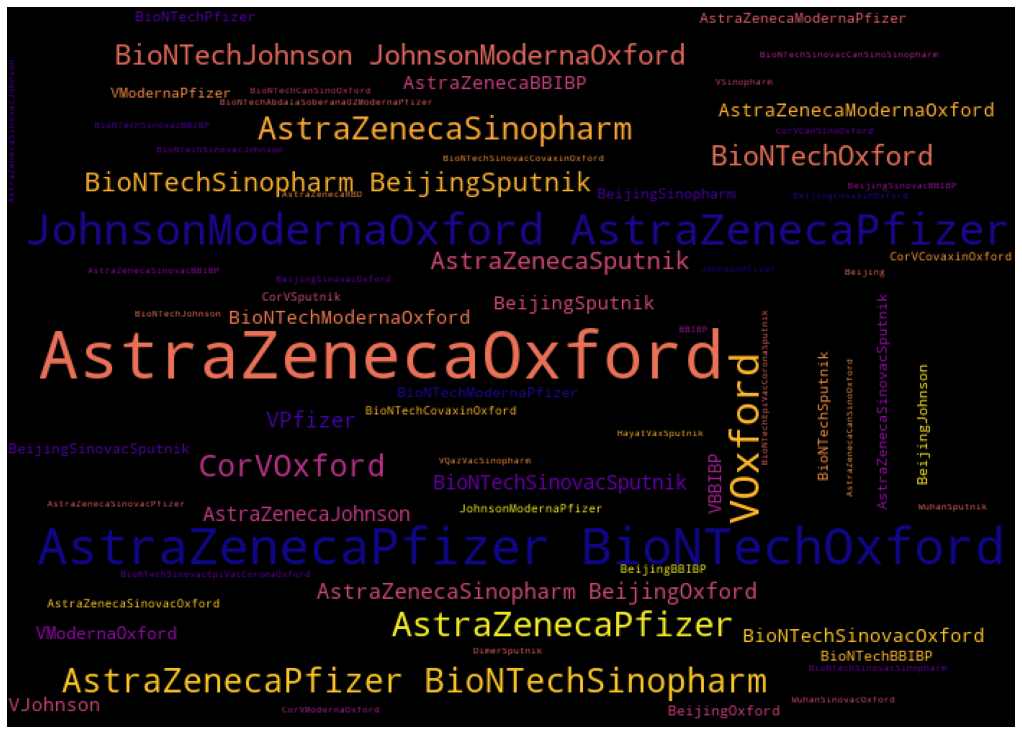

In [37]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,10))
words="".join(country_vaccine['vaccines'])

wordcloud = WordCloud(width=700, height=500, stopwords=STOPWORDS, background_color='black', random_state=30, colormap='plasma').generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

###**Which country started the vaccination drive first and last?**

In [38]:
df1['daily_vaccinations'] = df1['daily_vaccinations'].fillna(0)

In [39]:
df3 = df1.loc[df1['daily_vaccinations']>0, ['region', 'country', 'date', 'daily_vaccinations']] 

In [40]:
df4 = df3.groupby('country').first()
df4.sort_values(by=['date']).head(2)

,region,date,daily_vaccinations
country,,,
United Kingdom,Europe,2020-12-14,84117.0
Canada,Americas,2020-12-15,718.0


### *Observation: Canada and China started their vaccination drives in December*



In [41]:
df4.sort_values(by=['date']).tail(2)

,region,date,daily_vaccinations
country,,,
Tuvalu,Oceania,2021-06-02,24.0
Burkina Faso,Africa,2021-06-03,960.0


### *Observation: Vanuatu and Burkina Faso started their vaccination drives in June*

### *Plotting the ratio of people vaccinated to people fully vaccinated per 100*

In [42]:
df5 = df1.loc[df1['daily_vaccinations']>0, ['country', 'region', 'date', 'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred']]
#df5.info()
df5.dropna(axis=0, how='any', inplace=True)
df5 = df5.groupby('country').nth(-1)
df5.reset_index(inplace=True)
df5
#df5.groupby('region').last()

,country,region,date,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,Afghanistan,Asia,2021-06-22,1.50,0.47
1,Albania,Europe,2021-06-22,18.27,13.05
2,Andorra,Europe,2021-06-21,50.04,31.84
3,Angola,Africa,2021-06-20,2.64,1.56
4,Anguilla,Americas,2021-06-18,61.21,40.09
...,...,...,...,...,...
185,Venezuela,Americas,2021-06-18,3.79,0.79
186,Vietnam,Asia,2021-06-23,2.56,0.14
187,Wallis and Futuna,Oceania,2021-06-21,40.30,38.25
188,Zambia,Africa,2021-06-15,0.77,0.03


In [43]:
import numpy as np

for reg in df5['region'].unique():

  wide_df = df5[df5['region']==reg]
  country_var = np.array(wide_df['country'])
  # p1 = np.array(wide_df['people_vaccinated_per_hundred'])
  # p2 = np.array(wide_df['people_fully_vaccinated_per_hundred'])

  fig = px.bar(wide_df, 
              x=country_var, 
              y=['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'], 
              title="People vaccinated in "+reg+" per 100", 
              labels={"value": "% People vaccinated", "x": "Country", "variable": "People vaccinated"}, 
              )
  fig.show()

###**Countries that have vaccinated (1 dose) most of their population**

In [44]:
total_pop = df1.groupby('country')['total_vaccinations_per_hundred'].max().sort_values(ascending=False).head().reset_index()
total_pop

,country,total_vaccinations_per_hundred
0,Gibraltar,231.42
1,United Arab Emirates,148.99
2,Malta,144.05
3,Seychelles,140.00
4,Cayman Islands,136.36


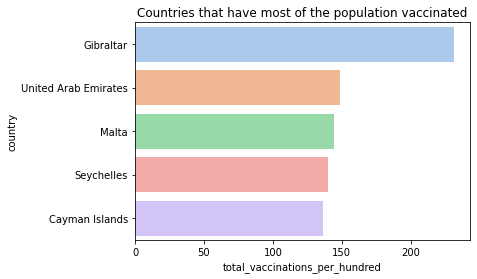

In [45]:
ax = sns.barplot(x='total_vaccinations_per_hundred', y="country", data=total_pop, palette="pastel").set_title("Countries that have most of the population vaccinated")

###**Countries with highest number of fully vaccinated people** 

In [46]:
fully_vaccinated = df1.groupby('country')['people_fully_vaccinated'].max().sort_values(ascending=False).head(10).reset_index()
fully_vaccinated.all()

country                    True
people_fully_vaccinated    True
dtype: bool

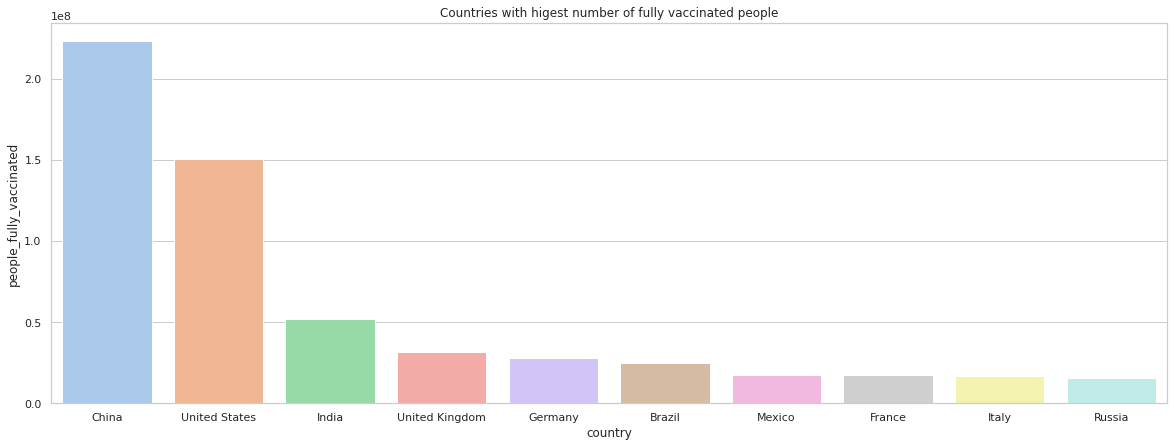

In [47]:
plt.figure(figsize=(20,7))

sns.set_theme(style='whitegrid')
ax = sns.barplot(x="country", y="people_fully_vaccinated", data=fully_vaccinated, palette="pastel").set_title("Countries with higest number of fully vaccinated people")

In [48]:
ts_df = df1.loc[df1["country"]=="India", ["country", "date", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred"]]
ts_df_c= df1.loc[df1["country"]=="United States", ["country", "date", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred"]]


###**Daily vaccination trend of the world**

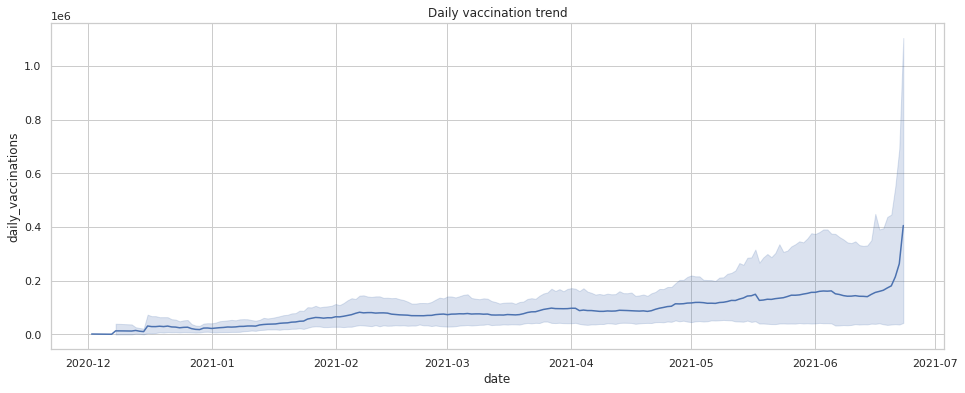

In [49]:
df1['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(16,6))
ax = sns.lineplot(x="date", y="daily_vaccinations", data=df1).set_title("Daily vaccination trend")


###**Vaccination drives in top 5 countries with hightest number of vaccinated people**

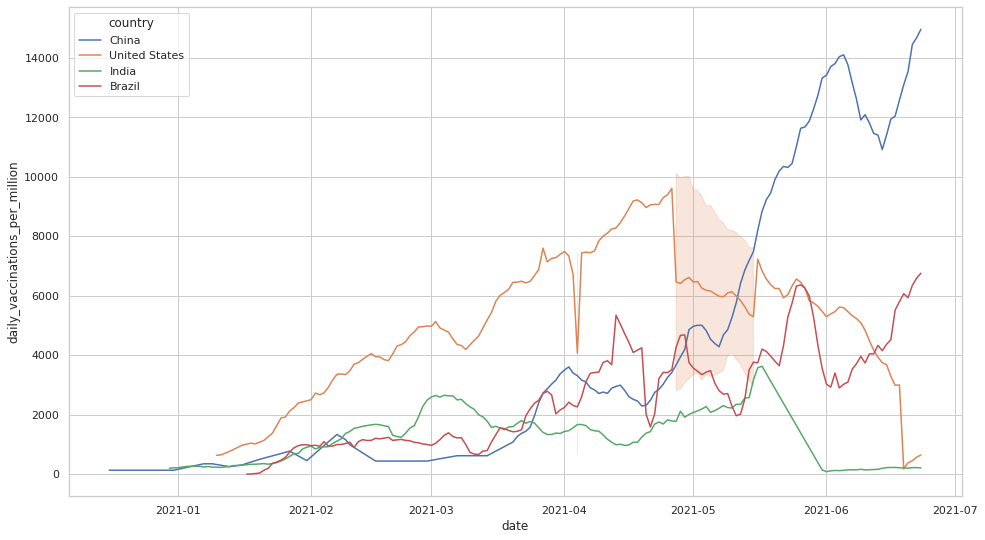

In [50]:
fully_vac_idx= df1.groupby('country')["total_vaccinations"].max().sort_values(ascending=False).head(4).index
country_top = pd.DataFrame(columns=df1.columns)
for idx in fully_vac_idx:
  country_top = country_top.append(df1.loc[df1['country'] == idx]) 

plt.figure(figsize=(16,9))
ax = sns.lineplot(x="date", y='daily_vaccinations_per_million', data=country_top, hue=country_top['country'])


##Time series. How many % people will be vaccinated in the upcoming 90 days in India? 
## Using AR

In [51]:
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

In [52]:
print(df1.info())
#ts_df = df1.loc[df1["country"]=="India", ["country", "date", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred"]]
#ts_df.dropna(axis=0, inplace=True)
ts_df.reset_index(inplace = True)
ts_df.drop(columns=["index"], inplace=True)
#ts_df["date"] = pd.to_datetime(ts_df["date"])
print(ts_df.info())
print(ts_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25555 entries, 0 to 25554
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              25555 non-null  object        
 1   region                               25555 non-null  object        
 2   iso_code                             25555 non-null  object        
 3   date                                 25555 non-null  datetime64[ns]
 4   total_vaccinations                   14142 non-null  float64       
 5   people_vaccinated                    13362 non-null  float64       
 6   people_fully_vaccinated              10677 non-null  float64       
 7   daily_vaccinations                   25555 non-null  float64       
 8   total_vaccinations_per_hundred       14142 non-null  float64       
 9   people_vaccinated_per_hundred        13362 non-null  float64       
 10  people_ful

In [53]:
plot_df = ts_df[["date", "people_vaccinated_per_hundred"]]
plot_df.dropna(subset=["people_vaccinated_per_hundred"], inplace=True)
X = plot_df.people_vaccinated_per_hundred.values
print(X)
print(plot_df.date)
#print(plot_df.info())
#print(plot_df.values)

[0.000e+00 1.000e-02 2.000e-02 3.000e-02 5.000e-02 6.000e-02 8.000e-02
 1.000e-01 1.100e-01 1.200e-01 1.500e-01 1.500e-01 1.700e-01 2.100e-01
 2.500e-01 2.700e-01 2.700e-01 2.900e-01 3.000e-01 3.200e-01 3.600e-01
 3.900e-01 4.200e-01 4.200e-01 4.500e-01 4.800e-01 5.100e-01 5.400e-01
 5.800e-01 5.800e-01 6.100e-01 6.300e-01 6.400e-01 6.800e-01 7.000e-01
 7.200e-01 7.300e-01 7.500e-01 7.700e-01 7.900e-01 8.100e-01 8.400e-01
 8.500e-01 8.600e-01 8.900e-01 9.400e-01 1.000e+00 1.070e+00 1.160e+00
 1.240e+00 1.250e+00 1.370e+00 1.450e+00 1.520e+00 1.550e+00 1.670e+00
 1.760e+00 1.770e+00 1.960e+00 2.090e+00 2.220e+00 2.350e+00 2.520e+00
 2.690e+00 2.720e+00 2.940e+00 3.100e+00 3.250e+00 3.410e+00 3.580e+00
 3.730e+00 3.740e+00 3.780e+00 3.910e+00 4.040e+00 4.290e+00 4.570e+00
 4.760e+00 4.980e+00 5.240e+00 5.500e+00 5.710e+00 5.980e+00 6.210e+00
 6.440e+00 6.640e+00 6.890e+00 7.050e+00 7.260e+00 7.420e+00 7.570e+00
 7.710e+00 7.780e+00 7.950e+00 8.090e+00 8.230e+00 8.540e+00 8.690e+00
 8.790

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



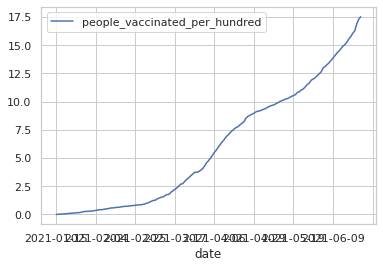

In [54]:
plot_df.plot(x="date")

Check for Stationarity

In [55]:
from statsmodels.tsa.stattools import adfuller
def adfullertest(test_df):
  dftest = adfuller(test_df, autolag = "AIC")
  print("1. ADF : ", dftest[0])
  print("2. P-value : ", dftest[1])
  print("3. Num of Lags : ", dftest[2])
  print("4. Num of Observations used for ADF Regression and Critical Values Calculation : ", dftest[3])
  print("5. Critical Values : ")
  for key in dftest[4].items():
    print("\t", key, ": ", val)

adfullertest(plot_df["people_vaccinated_per_hundred"])

1. ADF :  2.0757673894059034
2. P-value :  0.9987636672108617
3. Num of Lags :  3
4. Num of Observations used for ADF Regression and Critical Values Calculation :  151
5. Critical Values : 
	 ('1%', -3.4744158894942156) :  {0: ['BBIBP-CorV', 8.530805687203792], 1: ['EpiVacCorona', 0.9478672985781991], 2: ['Pfizer/BioNTech', 47.39336492890995], 3: ['Sinopharm/HayatVax', 0.47393364928909953], 4: ['RBD-Dimer', 0.47393364928909953], 5: ['Johnson&Johnson', 12.796208530805687], 6: ['Moderna', 24.170616113744074], 7: ['Sputnik V', 21.327014218009477], 8: ['Abdala', 0.47393364928909953], 9: ['Soberana02', 0.47393364928909953], 10: ['Covaxin', 2.843601895734597], 11: ['QazVac', 0.47393364928909953], 12: ['CanSino', 1.8957345971563981], 13: ['Sinopharm/Beijing', 18.95734597156398], 14: ['Sinopharm/Wuhan', 0.9478672985781991], 15: ['Sinovac', 14.691943127962086], 16: ['Oxford/AstraZeneca', 81.51658767772511]}
	 ('5%', -2.880878382771059) :  {0: ['BBIBP-CorV', 8.530805687203792], 1: ['EpiVacCorona

Since P-value is high, the series is non- stationary

To convert the graph to a stationary graph, we'll have to perform differencing

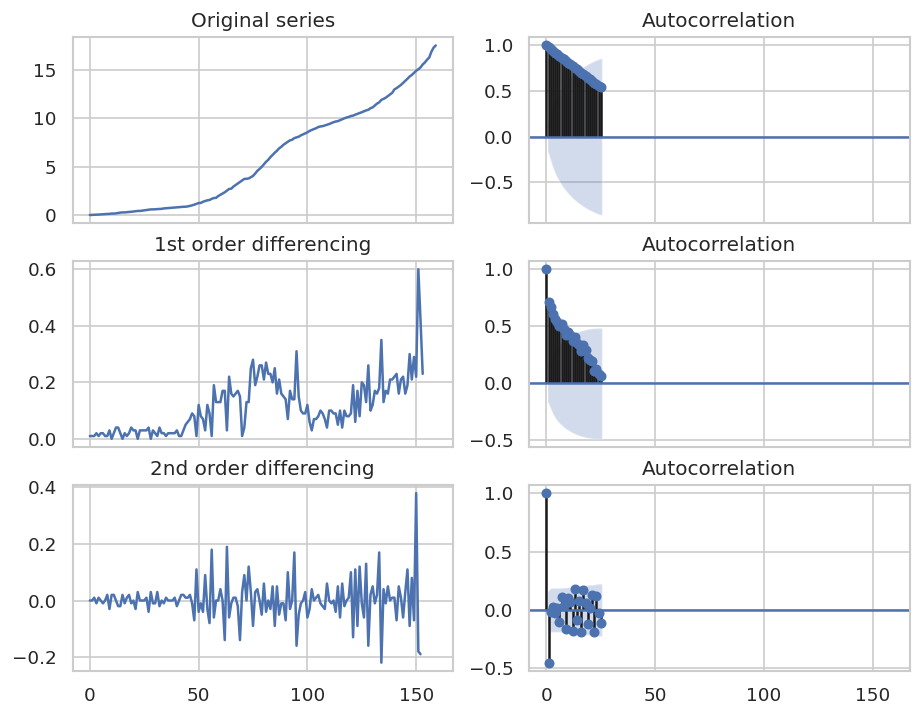

In [56]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

#pacf = plot_pacf(plot_df['people_vaccinated_per_hundred'], lags=50)

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2, sharex=True)

# Original Series
def original_series(test_df):
  axes[0,0].plot(test_df)
  axes[0,0].set_title("Original series")
  plot_acf(test_df, ax=axes[0,1], lags=25)

# 1st order differencing
def first_order(test_df):
  axes[1,0].plot(np.diff(test_df))
  axes[1,0].set_title("1st order differencing")
  plot_acf(np.diff(test_df), ax=axes[1,1], lags=25)

# 2nd order differencing
def second_order(test_df):
  axes[2,0].plot(np.diff(np.diff(test_df)))
  axes[2,0].set_title("2nd order differencing")
  plot_acf(np.diff(np.diff(test_df)), ax=axes[2,1], lags=25)

original_series(plot_df['people_vaccinated_per_hundred'])
first_order(plot_df['people_vaccinated_per_hundred'])
second_order(plot_df['people_vaccinated_per_hundred'])

plt.show()

#acf = plot_acf(plot_df['people_vaccinated_per_hundred'], lags=50)

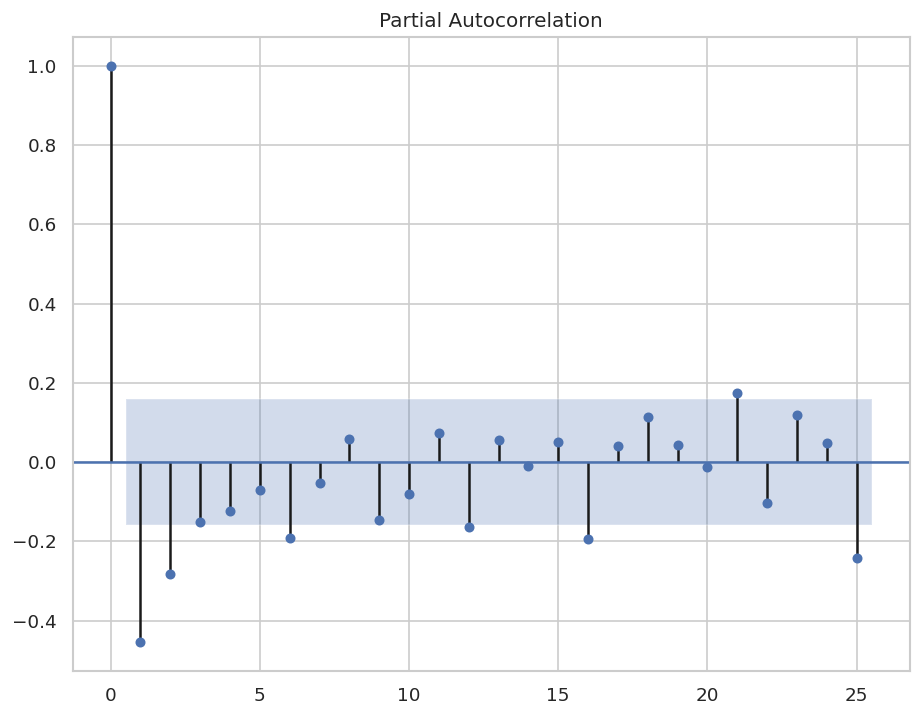

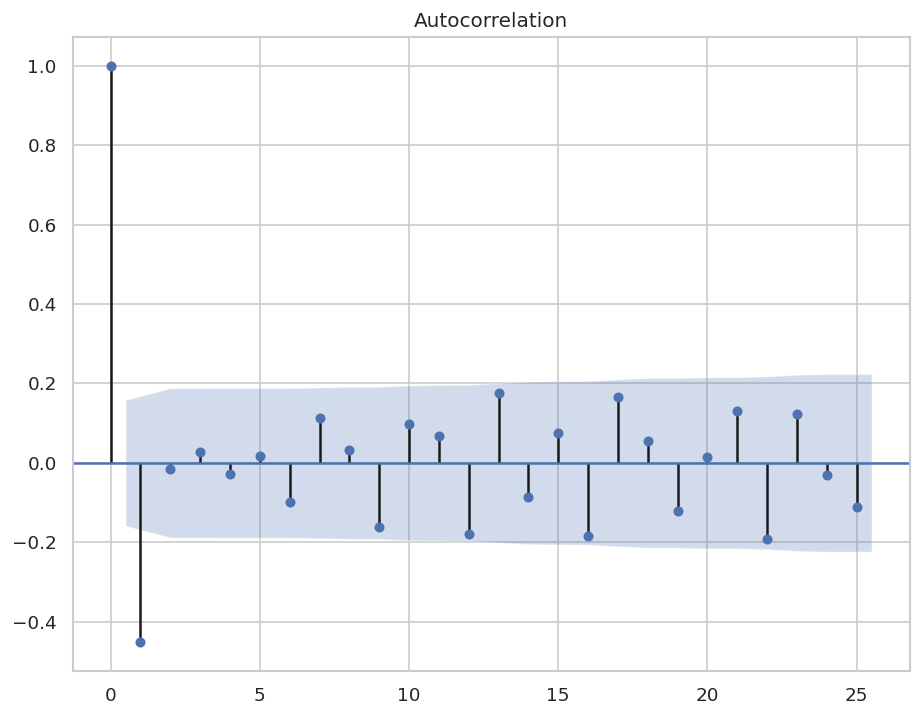

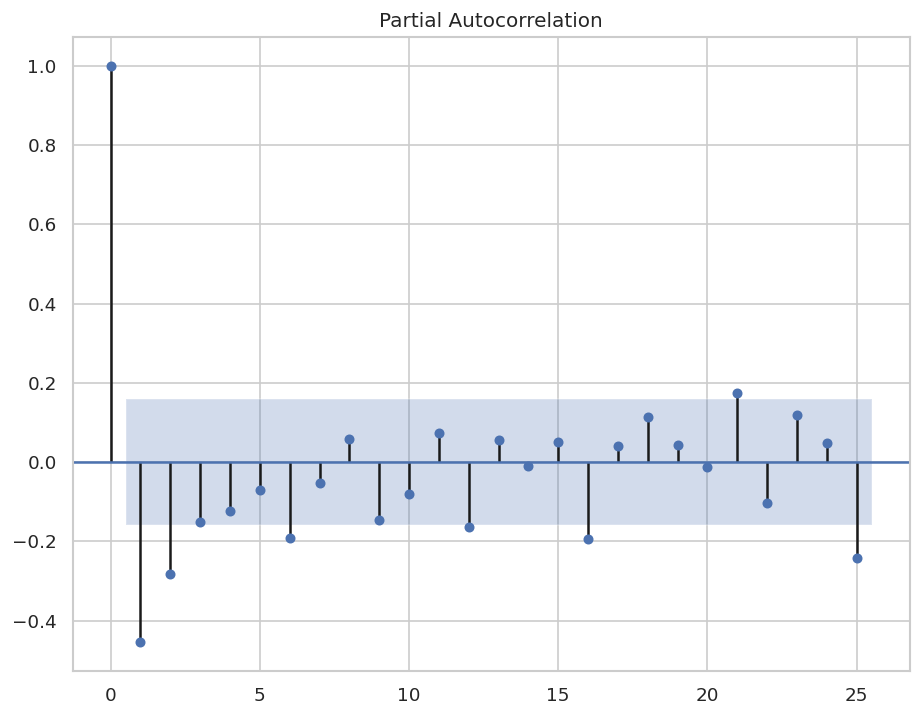

In [57]:
plot_acf(np.diff(np.diff(plot_df['people_vaccinated_per_hundred'])), lags=25)
plot_pacf(np.diff(np.diff(plot_df['people_vaccinated_per_hundred'])), lags=25)

In [58]:
train = X[:len(X)-10]
test = X[len(X)-10:]

In [59]:
model = AutoReg(train, lags=2).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning:

The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 



In [60]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  145
Model:                     AutoReg(2)   Log Likelihood                 214.165
Method:               Conditional MLE   S.D. of innovations              0.054
Date:                Mon, 20 Sep 2021   AIC                             -5.777
Time:                        06:28:29   BIC                             -5.694
Sample:                             2   HQIC                            -5.744
                                  145                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0222      0.008      2.907      0.004       0.007       0.037
y.L1           1.6003      0.067     23.756      0.000       1.468       1.732
y.L2          -0.5965      0.068     -8.769      0.0

In [61]:
print(len(train))

145


Make predictions on Test Set and Compare

In [62]:
pred = model.predict(start=len(train), end=len(X)-1, dynamic=False)

[14.88353977 15.08400383 15.28339919 15.48291892 15.68327512 15.88489574
 16.08804086 16.29287145 16.49948996 16.70796433]


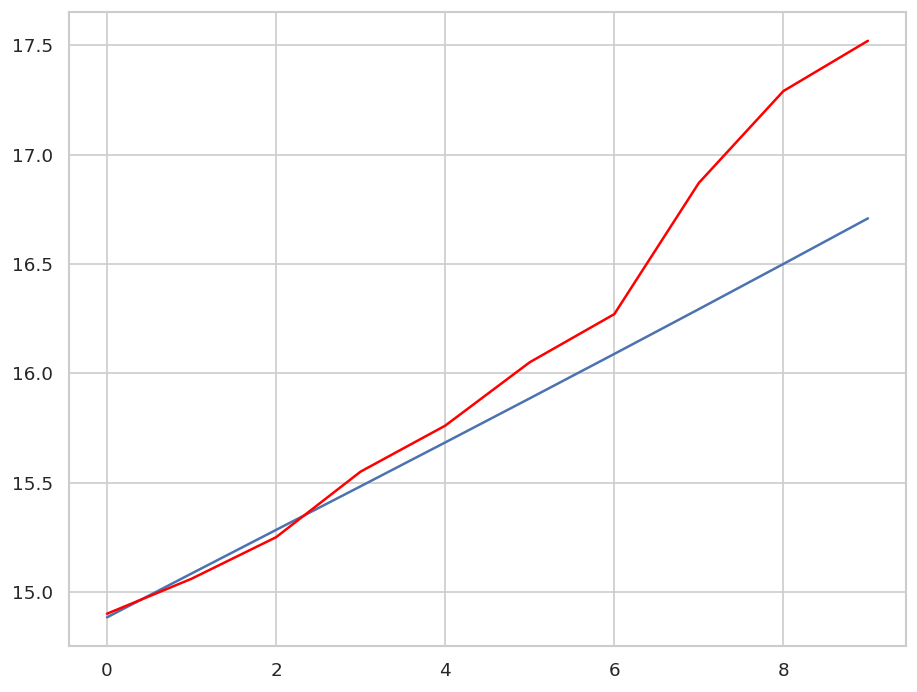

In [63]:
pyplot.plot(pred)
pyplot.plot(test, color='red')
print(pred)

Calculate Error

In [64]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(test, pred))

In [65]:
print("Mean of the values: ", plot_df['people_vaccinated_per_hundred'].mean())

Mean of the values:  5.968838709677417


In [66]:
print(rmse)

0.41110864347438936


making future predictions

In [67]:
pred_future = model.predict(start=len(X)+1, end = len(X)+90, dynamic = False )
print("The future prediction for the next 90 days")
print(pred_future)
print("Num of predictions made : ", len(pred_future))

The future prediction for the next 90 days
[17.13065915 17.34494397 17.56122125 17.7795133  17.99984111 18.22222499
 18.44668492 18.67324071 18.90191223 19.1327194  19.36568224 19.60082095
 19.83815588 20.07770758 20.31949675 20.5635443  20.80987133 21.05849913
 21.30944919 21.56274321 21.81840308 22.0764509  22.33690896 22.59979979
 22.86514611 23.13297085 23.40329715 23.6761484  23.95154817 24.22952026
 24.5100887  24.79327774 25.07911186 25.36761576 25.65881439 25.95273291
 26.24939672 26.54883147 26.85106304 27.15611755 27.46402137 27.77480111
 28.08848364 28.40509606 28.72466575 29.04722033 29.37278767 29.70139591
 30.03307347 30.367849   30.70575145 31.04681002 31.39105418 31.7385137
 32.0892186  32.44319921 32.80048611 33.16111018 33.5251026  33.89249484
 34.26331863 34.63760604 35.01538942 35.39670142 35.781575   36.17004343
 36.56214027 36.95789944 37.35735512 37.76054185 38.16749447 38.57824817
 38.99283844 39.41130112 39.83367238 40.25998872 40.690287   41.12460441
 41.56297

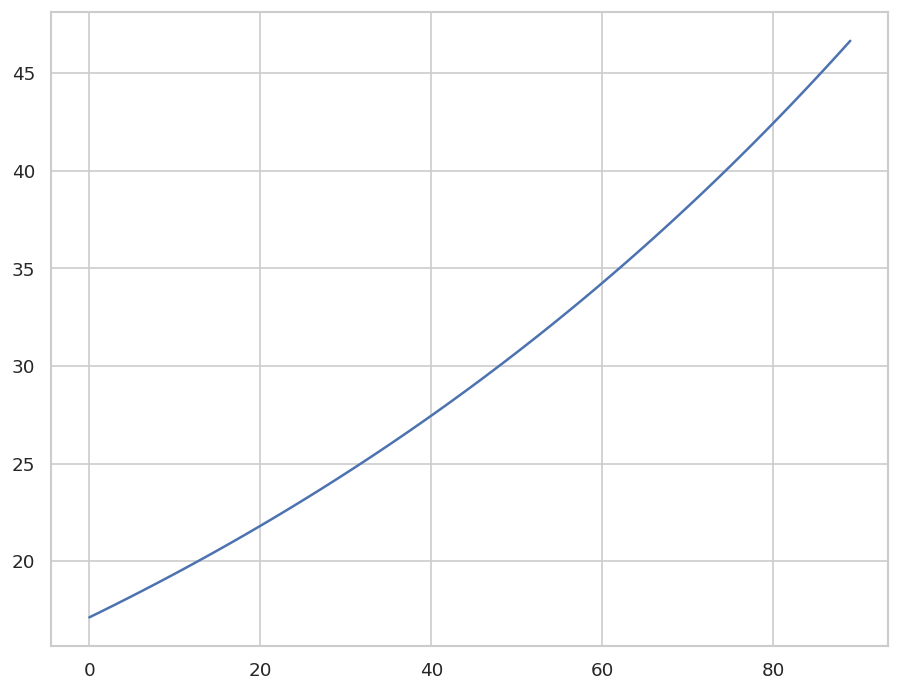

In [68]:
pyplot.plot(pred_future)

### ***Hence we've predicted using the previous values of people vaccinated per 100 that how much population will have been vaccinated by the end of the upcoming 3 months***

---



##Using ARIMA for predicting the % people vaccinated in future 90 days in US 

In [69]:
#ts_df_c.set_index('date', inplace=True)
ts_df_c.head()
ts_df_c.dropna(subset=['people_vaccinated_per_hundred'], inplace=True)
print(ts_df_c.shape)

(170, 4)


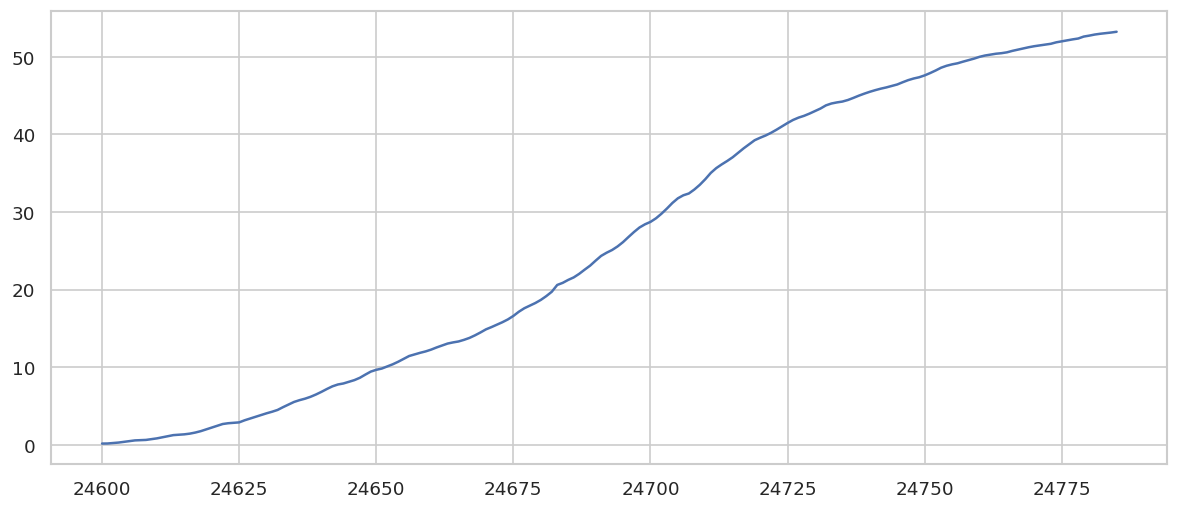

In [70]:
ts_df_c['people_vaccinated_per_hundred'].plot(figsize=(12,5))

Check for Stationarity

In [71]:
adfullertest(ts_df_c['people_vaccinated_per_hundred'])

1. ADF :  -2.096893481842592
2. P-value :  0.24576558151000616
3. Num of Lags :  13
4. Num of Observations used for ADF Regression and Critical Values Calculation :  156
5. Critical Values : 
	 ('1%', -3.4729792729247793) :  {0: ['BBIBP-CorV', 8.530805687203792], 1: ['EpiVacCorona', 0.9478672985781991], 2: ['Pfizer/BioNTech', 47.39336492890995], 3: ['Sinopharm/HayatVax', 0.47393364928909953], 4: ['RBD-Dimer', 0.47393364928909953], 5: ['Johnson&Johnson', 12.796208530805687], 6: ['Moderna', 24.170616113744074], 7: ['Sputnik V', 21.327014218009477], 8: ['Abdala', 0.47393364928909953], 9: ['Soberana02', 0.47393364928909953], 10: ['Covaxin', 2.843601895734597], 11: ['QazVac', 0.47393364928909953], 12: ['CanSino', 1.8957345971563981], 13: ['Sinopharm/Beijing', 18.95734597156398], 14: ['Sinopharm/Wuhan', 0.9478672985781991], 15: ['Sinovac', 14.691943127962086], 16: ['Oxford/AstraZeneca', 81.51658767772511]}
	 ('5%', -2.8802520918255534) :  {0: ['BBIBP-CorV', 8.530805687203792], 1: ['EpiVacCor

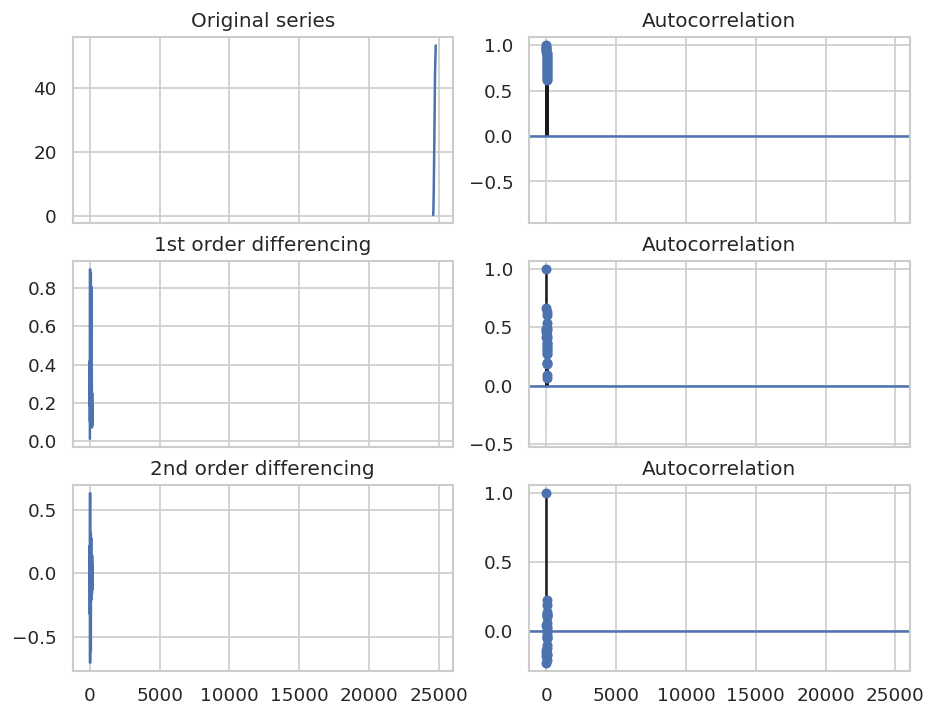

In [72]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2, sharex=True)

original_series(ts_df_c['people_vaccinated_per_hundred'])
first_order(ts_df_c['people_vaccinated_per_hundred'])
second_order(ts_df_c['people_vaccinated_per_hundred'])
plt.show()

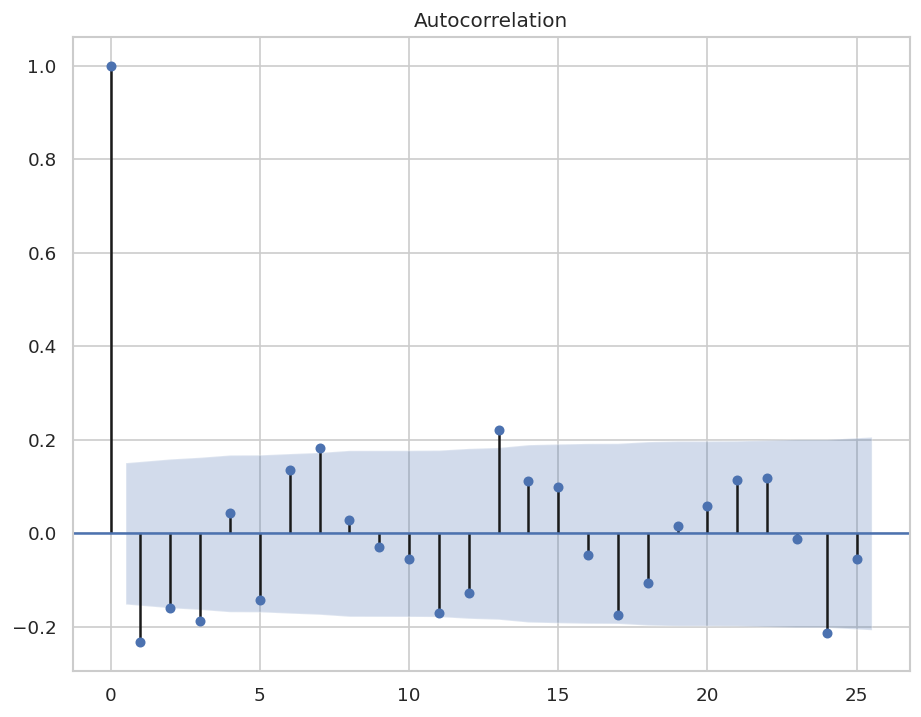

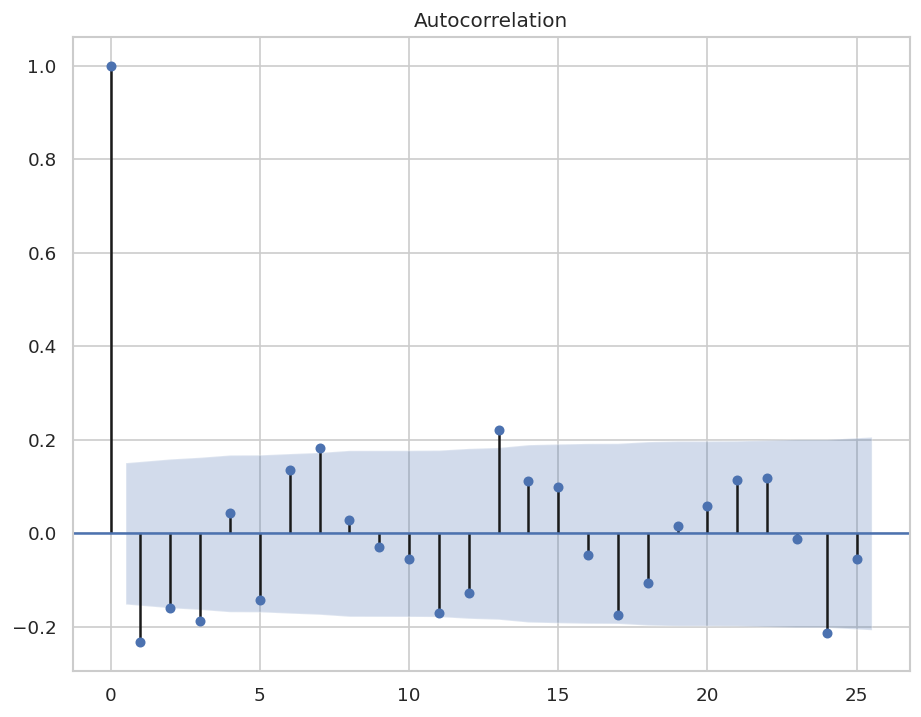

In [73]:
plot_acf(np.diff(np.diff(ts_df_c['people_vaccinated_per_hundred'])), lags=25)
#plot_pacf(np.diff(np.diff(ts_df_c['people_vaccinated_per_hundred'])), lags=25)

In [74]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 5.1 MB/s 


In [75]:
from pmdarima import auto_arima
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [76]:
stepwise_fit = auto_arima(ts_df_c['people_vaccinated_per_hundred'], trace=True, supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-246.256, Time=0.42 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-182.910, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-190.281, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-217.762, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-227.475, Time=0.18 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-231.042, Time=0.14 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-248.806, Time=0.40 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-237.067, Time=0.16 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=-233.178, Time=0.47 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=-245.740, Time=0.40 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-234.963, Time=0.49 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=-237.325, Time=0.30 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=-245.026, Time=0.58 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-232.164, Time=0.59 sec

Best model:  ARIMA(3,2,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  170
Model:               SARIMAX(3, 2, 2)   Log Likelihood                 130.403
Date:                Mon, 20 Sep 2021   AIC                           -248.806
Time:                        06:28:41   BIC                           -230.062
Sample:                             0   HQIC                          -241.198
                                - 170                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7823      0.131      5.963      0.000       0.525       1.039
ar.L2         -0.4220      0.105     -4.029      0.000      -0.627      -0.217
ar.L3         -0.2267      0.097     -2.336      0.019      -0.417      -0.037
ma.L1         -1.3994      0.122    -11.455      0.000      -1.639      -1.160
ma.L2          0.6722      0.122      5.506      0.000       0.433       0.911
sigma2         0.0123      0.001     16.853      0.000       0.011       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               467.54
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             1.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
from statsmodels.tsa.arima_model import ARIMA

In [78]:
train = ts_df_c.iloc[:-15]
test = ts_df_c.iloc[-15:]
print(train.shape, test.shape)

(155, 4) (15, 4)


Train model

In [79]:
model1 = ARIMA(train['people_vaccinated_per_hundred'], order=(3,2,2))
model1 = model1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    ARIMA Model Results                                     
============================================================================================
Dep. Variable:     D2.people_vaccinated_per_hundred   No. Observations:                  153
Model:                               ARIMA(3, 2, 2)   Log Likelihood                 112.880
Method:                                     css-mle   S.D. of innovations              0.115
Date:                              Mon, 20 Sep 2021   AIC                           -211.761
Time:                                      06:28:42   BIC                           -190.548
Sample:                                           2   HQIC                          -203.144
                                                                                            
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1.431e-05      0.003      0.005      0.996      -0.006       0.006
ar.L1.D2.people_vaccinated_per_hundred     0.7873      0.113      6.974      0.000       0.566       1.009
ar.L2.D2.people_vaccinated_per_hundred    -0.4265      0.100     -4.253      0.000      -0.623      -0.230
ar.L3.D2.people_vaccinated_per_hundred    -0.2208      0.099     -2.220      0.026      -0.416      -0.026
ma.L1.D2.people_vaccinated_per_hundred    -1.4031      0.089    -15.687      0.000      -1.578      -1.228
ma.L2.D2.people_vaccinated_per_hundred     0.6734      0.085      7.886      0.000       0.506       0.841
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7251           -0.9019j            1.1572           -0.1422
AR.2            0.7251           +0.9019j            1.1572            0.1422
AR.3           -3.3817           -0.0000j            3.3817           -0.5000
MA.1            1.0417           -0.6322j            1.2186           -0.0868
MA.2            1.0417           +0.6322j            1.2186            0.0868
-----------------------------------------------------------------------------
"""

Make predictions on testing data

In [80]:
start = len(train)
end = len(train) + len(test) -1
pred2 = model1.predict(start=start, end=end, typ='levels')
pred2.index = ts_df_c.index[start:end+1]
print(pred2)

24771    51.483276
24772    51.623322
24773    51.769521
24774    51.916967
24775    52.061286
24776    52.201266
24777    52.338901
24778    52.477243
24779    52.618112
24780    52.761198
24781    52.904810
24782    53.047343
24783    53.188326
24784    53.328445
24785    53.468794
dtype: float64


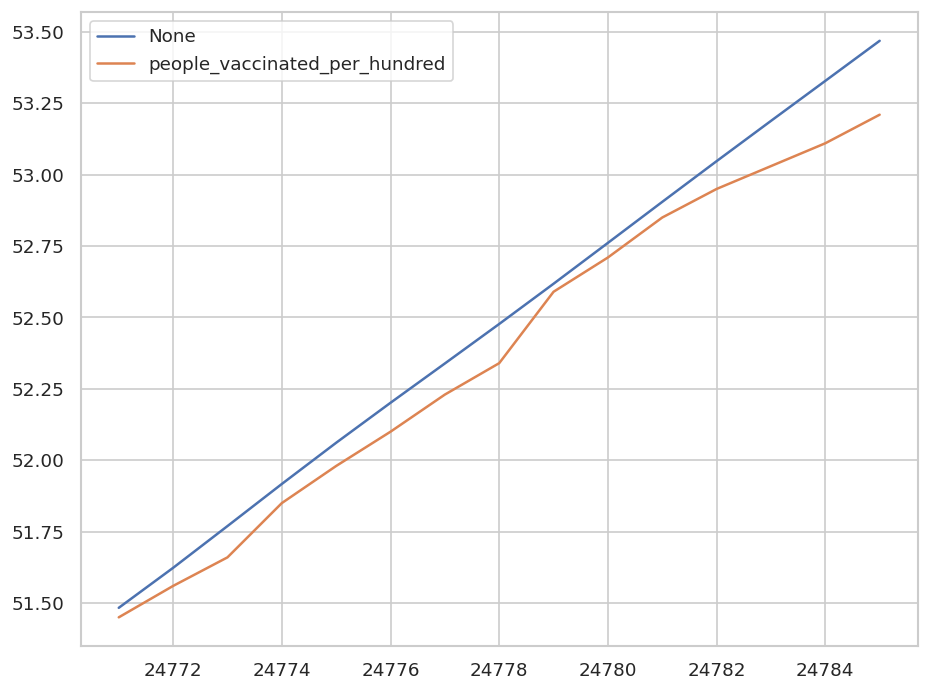

In [81]:
pred2.plot(legend=True)
test['people_vaccinated_per_hundred'].plot(legend=True)

In [82]:
test['people_vaccinated_per_hundred'].mean()

52.374666666666684

Calculating error

In [83]:
rmse = sqrt(mean_squared_error(pred2, test['people_vaccinated_per_hundred']))
print(rmse)

0.1224213683512581


In [84]:
len(ts_df_c)

170

Train the entire dataset

In [85]:
model2 = ARIMA(ts_df_c['people_vaccinated_per_hundred'], order=(3,2,2))
model2 = model2.fit()
ts_df_c.tail()

,country,date,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
24781,United States,2021-06-19,52.85,44.59
24782,United States,2021-06-20,52.95,44.75
24783,United States,2021-06-21,53.03,44.86
24784,United States,2021-06-22,53.11,44.98
24785,United States,2021-06-23,53.21,45.09


Prediction on future 90 days 

In [86]:
pred3 = model2.predict(start=len(ts_df_c), end=len(ts_df_c)+90 , typ='levels'  , dynamic=False)
index_future_dates = pd.date_range(start="2021-06-15", periods=91)
pred3.index = index_future_dates
print(pred3)
print(len(pred3))

2021-06-15    53.344021
2021-06-16    53.471797
2021-06-17    53.575647
2021-06-18    53.655476
2021-06-19    53.727813
                ...    
2021-09-09    60.675145
2021-09-10    60.749249
2021-09-11    60.823099
2021-09-12    60.896695
2021-09-13    60.970037
Freq: D, Length: 91, dtype: float64
91


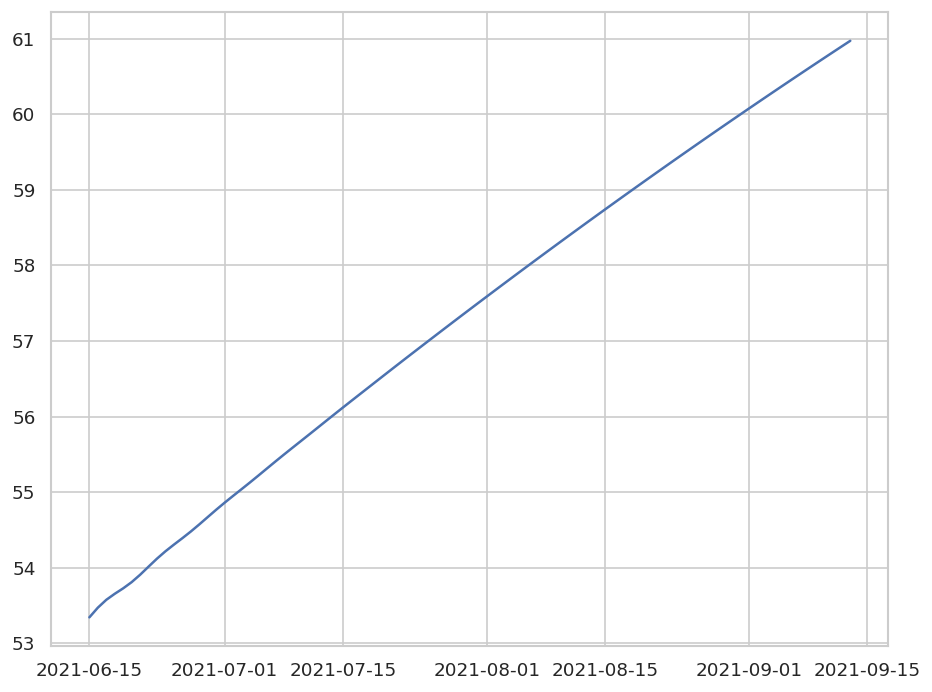

In [87]:
pyplot.plot(pred3)

In [88]:
#@title Default title text
